Kernel Classification Example

In [6]:
import numpy as np
import matplotlib.pyplot as plt

p = int(2) #features
n = int(1000) #examples

## generate training data
X = np.random.rand(n,p)-0.5
Y1 = np.sign(np.sum(X**2,1)-.1).reshape((-1, 1))

Y2 = np.sign(5*X[:,[0]]**3-X[:,[1]])
Y = np.hstack((Y1, Y2))

print(X)

[[ 0.37887019 -0.27718479]
 [-0.32463326 -0.29653799]
 [ 0.43808643  0.46773272]
 ...
 [-0.04541704 -0.01301339]
 [-0.40668032  0.02481273]
 [-0.12556079 -0.20150318]]


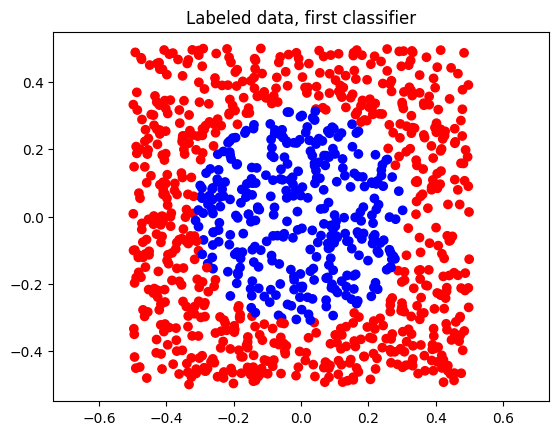

In [4]:
# Plot training data for first classification problem
plt.scatter(X[:,0], X[:,1], color=['b' if i==-1 else 'r' for i in Y1[:,0]])
plt.axis('equal')
plt.title('Labeled data, first classifier')
plt.show()

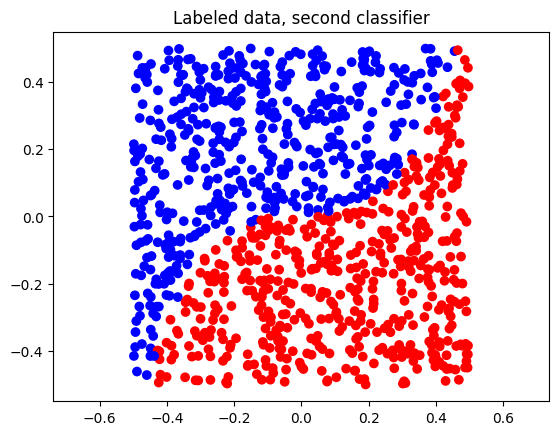

In [ ]:
# Plot training data for second classification problem 
plt.scatter(X[:,0], X[:,1], color=['b' if i==-1 else 'r' for i in Y2[:,0]])
plt.title('Labeled data, second classifier')
plt.axis('equal')
plt.show()

[[1.         0.99796238 0.99300211 ... 0.9975313  0.98919783 0.99821231]
 [0.99796238 1.         0.99576065 ... 0.99863601 0.99643466 0.99876198]
 [0.99300211 0.99576065 1.         ... 0.99880745 0.99136069 0.99826824]
 ...
 [0.9975313  0.99863601 0.99880745 ... 1.         0.99289991 0.99994292]
 [0.98919783 0.99643466 0.99136069 ... 0.99289991 1.         0.99243551]
 [0.99821231 0.99876198 0.99826824 ... 0.99994292 0.99243551 1.        ]]
[[ 0.47125501  0.03588745]
 [ 0.19887374 -0.13082668]
 [-0.08888652  0.22919006]
 ...
 [ 0.13022095  0.12123078]
 [-0.10021085 -0.42937967]
 [ 0.18351952  0.11757514]]
[[  58.04698671]
 [-112.23961095]
 [-110.09378921]
 [  51.1214792 ]
 [-116.72029639]
 [  47.51209857]
 [  52.55478349]
 [  36.53510089]
 [  57.70793083]
 [-107.17030963]
 [  45.77348814]
 [  64.14382028]
 [-110.25575362]
 [  55.31948109]
 [-113.91977803]
 [-102.16821082]
 [-115.3298762 ]
 [  62.81210274]
 [  56.02504384]
 [-112.78785758]
 [  50.06625884]
 [  70.93259974]
 [-112.8957973

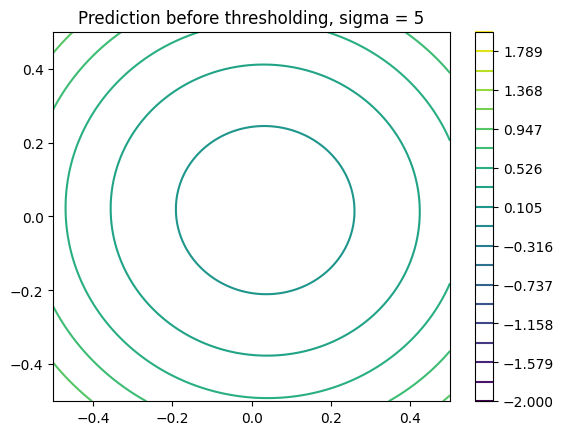

Text(0.5, 1.0, 'Prediction after thresholding, sigma = 5')

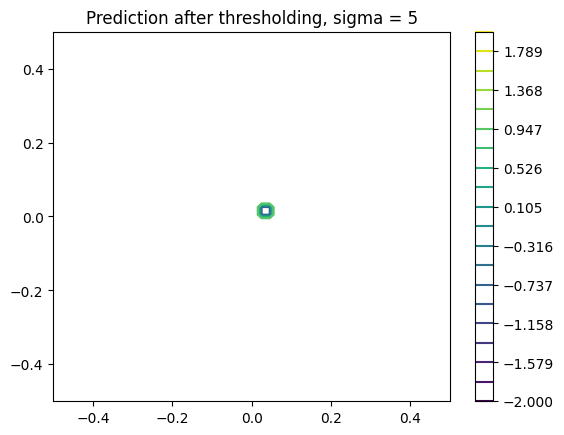

In [5]:
# Train Classifier 1
sigma = 5
lam = 0.01

distsq=np.zeros((n,n),dtype=float)

for i in range(0,n):
    for j in range(0,n):
        d = np.linalg.norm(X[i,:]-X[j,:])
        distsq[i,j]=d**2
        
K = np.exp(-distsq/(2*sigma**2))

alpha = np.linalg.inv(K+lam*np.identity(n))@Y1


# Predict labels on a grid of points 

X_grid = []
Y_hat_grid = []

g = 100 #number of grid points
Y_hat_grid = np.zeros((g,g))

x1_grid = np.linspace(-.5,.5,g)
x2_grid = np.linspace(-.5,.5,g)

for i,x1 in enumerate(x1_grid):
    for j,x2 in enumerate(x2_grid):
        Y_hat_grid[i,j] = np.exp(-np.linalg.norm(X - np.array([x1,x2]), axis = 1)**2/(2*sigma**2))@alpha

plt.contour(x1_grid, x2_grid, Y_hat_grid, np.linspace(-2,2,20))
plt.colorbar()
plt.title('Prediction before thresholding, sigma = '+ str(sigma))
plt.show()

plt.contour(x1_grid, x2_grid, np.sign(Y_hat_grid), np.linspace(-2,2,20))
plt.colorbar()
plt.title('Prediction after thresholding, sigma = '+ str(sigma))

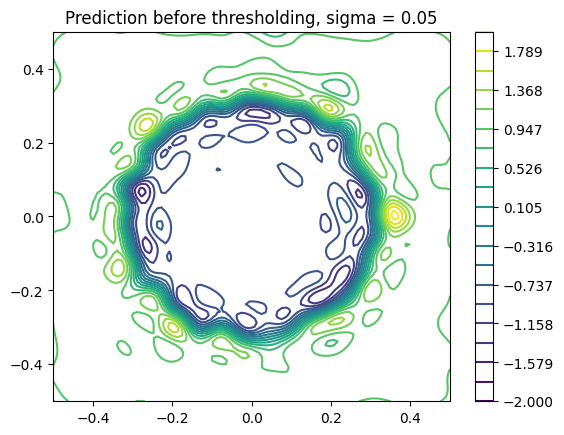

Text(0.5, 1.0, 'Prediction after thresholding, sigma = 0.05')

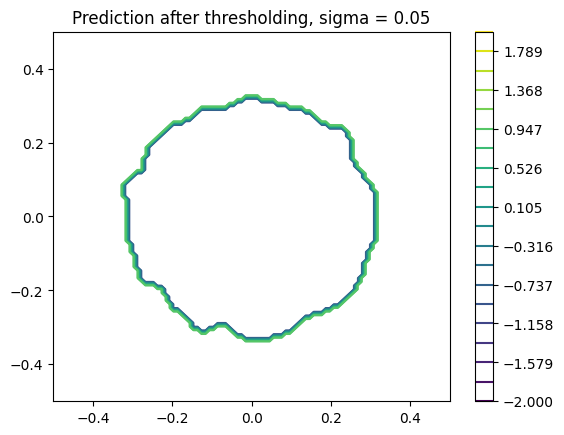

In [ ]:
# Train Classifier 1
sigma = 0.05
lam = 0.01

distsq=np.zeros((n,n),dtype=float)

for i in range(0,n):
    for j in range(0,n):
        d = np.linalg.norm(X[i,:]-X[j,:])
        distsq[i,j]=d**2
        
K = np.exp(-distsq/(2*sigma**2))

alpha = np.linalg.inv(K+lam*np.identity(n))@Y1


# Predict labels on a grid of points 

X_grid = []
Y_hat_grid = []

g = 100 #number of grid points
Y_hat_grid = np.zeros((g,g))

x1_grid = np.linspace(-.5,.5,g)
x2_grid = np.linspace(-.5,.5,g)

for i,x1 in enumerate(x1_grid):
    for j,x2 in enumerate(x2_grid):
        Y_hat_grid[i,j] = np.exp(-np.linalg.norm(X - np.array([x1,x2]), axis = 1)**2/(2*sigma**2))@alpha

plt.contour(x1_grid, x2_grid, Y_hat_grid, np.linspace(-2,2,20))
plt.colorbar()
plt.title('Prediction before thresholding, sigma = '+ str(sigma))
plt.show()

plt.contour(x1_grid, x2_grid, np.sign(Y_hat_grid), np.linspace(-2,2,20))
plt.colorbar()
plt.title('Prediction after thresholding, sigma = '+ str(sigma))

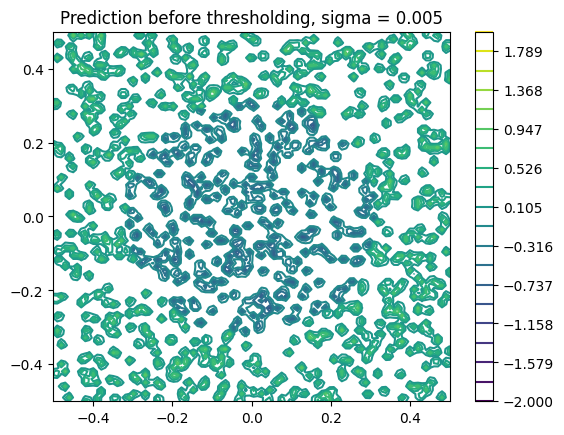

Text(0.5, 1.0, 'Prediction after thresholding, sigma = 0.005')

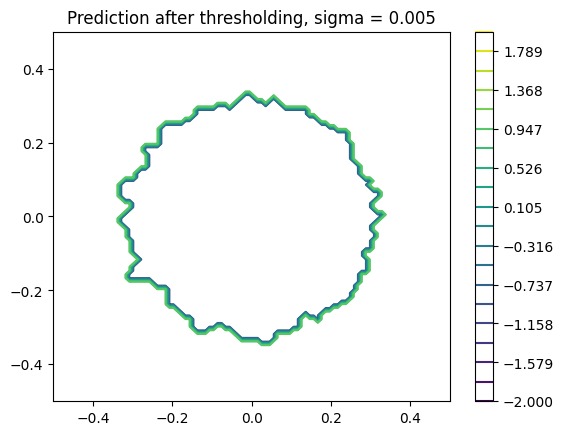

In [ ]:
# Train Classifier 1
sigma = 0.005
lam = 0.01

distsq=np.zeros((n,n),dtype=float)

for i in range(0,n):
    for j in range(0,n):
        d = np.linalg.norm(X[i,:]-X[j,:])
        distsq[i,j]=d**2
        
K = np.exp(-distsq/(2*sigma**2))

alpha = np.linalg.inv(K+lam*np.identity(n))@Y1


# Predict labels on a grid of points 

X_grid = []
Y_hat_grid = []

g = 100 #number of grid points
Y_hat_grid = np.zeros((g,g))

x1_grid = np.linspace(-.5,.5,g)
x2_grid = np.linspace(-.5,.5,g)

for i,x1 in enumerate(x1_grid):
    for j,x2 in enumerate(x2_grid):
        Y_hat_grid[i,j] = np.exp(-np.linalg.norm(X - np.array([x1,x2]), axis = 1)**2/(2*sigma**2))@alpha

plt.contour(x1_grid, x2_grid, Y_hat_grid, np.linspace(-2,2,20))
plt.colorbar()
plt.title('Prediction before thresholding, sigma = '+ str(sigma))
plt.show()

plt.contour(x1_grid, x2_grid, np.sign(Y_hat_grid), np.linspace(-2,2,20))
plt.colorbar()
plt.title('Prediction after thresholding, sigma = '+ str(sigma))

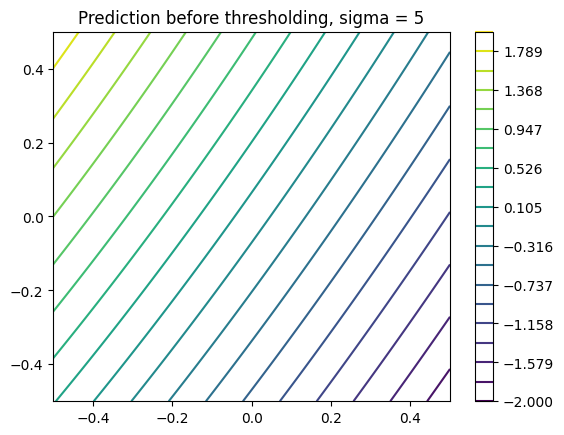

[[ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]


Text(0.5, 1.0, 'Prediction after thresholding, sigma = 5')

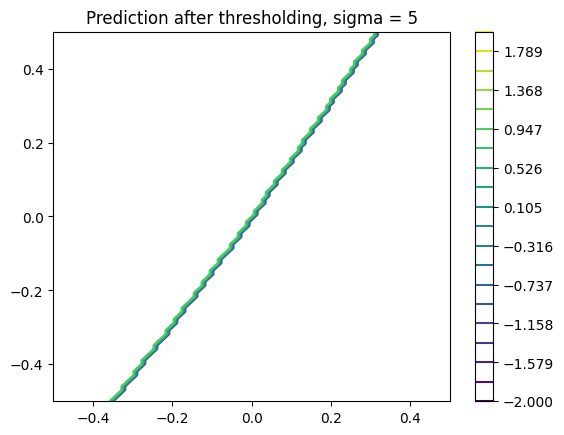

In [8]:
# Train Classifier 2
sigma = 5
lam = 0.01

distsq=np.zeros((n,n),dtype=float)

for i in range(0,n):
    for j in range(0,n):
        d = np.linalg.norm(X[i,:]-X[j,:])
        distsq[i,j]=d**2
        
K = np.exp(-distsq/(2*sigma**2))

alpha = np.linalg.inv(K+lam*np.identity(n))@Y2


# Predict labels on a grid of points 
X_grid = []
Y_hat_grid = []

g = 100 #number of grid points
Y_hat_grid = np.zeros((g,g))

x1_grid = np.linspace(-.5,.5,g)
x2_grid = np.linspace(-.5,.5,g)

for i,x1 in enumerate(x1_grid):
    for j,x2 in enumerate(x2_grid):
        Y_hat_grid[i,j] = np.exp(-np.linalg.norm(X - np.array([x1,x2]), axis = 1)**2/(2*sigma**2))@alpha

plt.contour(x1_grid, x2_grid, Y_hat_grid, np.linspace(-2,2,20))
plt.colorbar()
plt.title('Prediction before thresholding, sigma = '+ str(sigma))
plt.show()

print(np.sign(Y_hat_grid))

plt.contour(x1_grid, x2_grid, np.sign(Y_hat_grid), np.linspace(-2,2,20))
plt.colorbar()
plt.title('Prediction after thresholding, sigma = '+ str(sigma))

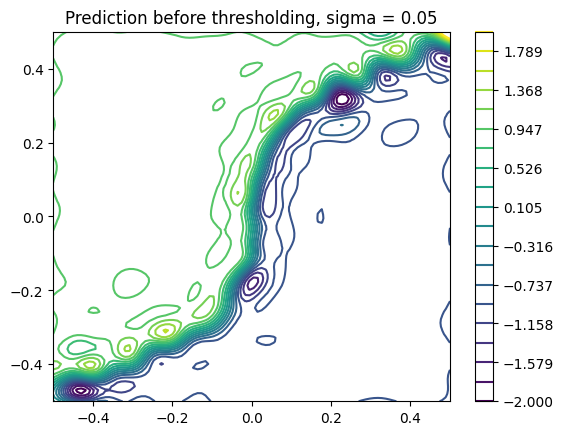

Text(0.5, 1.0, 'Prediction after thresholding, sigma = 0.05')

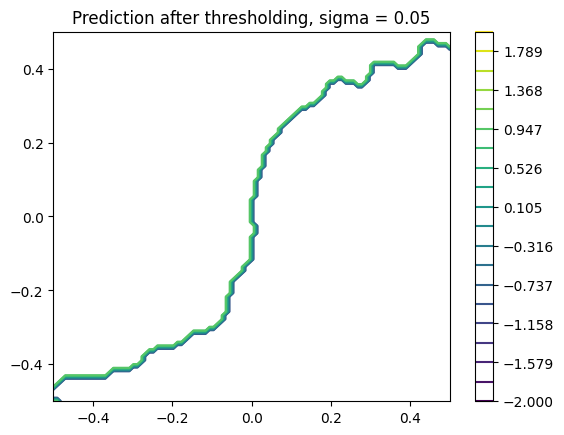

In [ ]:
# Train Classifier 2
sigma = 0.05
lam = 0.01

distsq=np.zeros((n,n),dtype=float)

for i in range(0,n):
    for j in range(0,n):
        d = np.linalg.norm(X[i,:]-X[j,:])
        distsq[i,j]=d**2
        
K = np.exp(-distsq/(2*sigma**2))

alpha = np.linalg.inv(K+lam*np.identity(n))@Y2


# Predict labels on a grid of points 
X_grid = []
Y_hat_grid = []

g = 100 #number of grid points
Y_hat_grid = np.zeros((g,g))

x1_grid = np.linspace(-.5,.5,g)
x2_grid = np.linspace(-.5,.5,g)

for i,x1 in enumerate(x1_grid):
    for j,x2 in enumerate(x2_grid):
        Y_hat_grid[i,j] = np.exp(-np.linalg.norm(X - np.array([x1,x2]), axis = 1)**2/(2*sigma**2))@alpha

plt.contour(x1_grid, x2_grid, Y_hat_grid, np.linspace(-2,2,20))
plt.colorbar()
plt.title('Prediction before thresholding, sigma = '+ str(sigma))
plt.show()

plt.contour(x1_grid, x2_grid, np.sign(Y_hat_grid), np.linspace(-2,2,20))
plt.colorbar()
plt.title('Prediction after thresholding, sigma = '+ str(sigma))

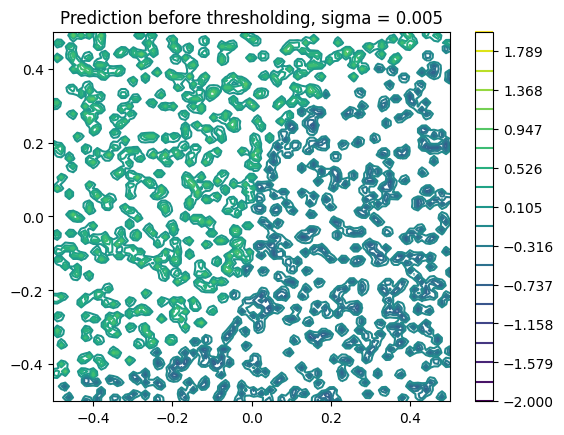

Text(0.5, 1.0, 'Prediction after thresholding, sigma = 0.005')

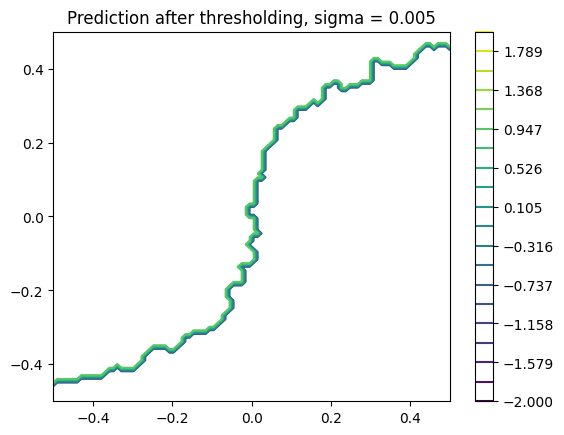

In [ ]:
# Train Classifier 2
sigma = 0.005
lam = 0.01

distsq=np.zeros((n,n),dtype=float)

for i in range(0,n):
    for j in range(0,n):
        d = np.linalg.norm(X[i,:]-X[j,:])
        distsq[i,j]=d**2
        
K = np.exp(-distsq/(2*sigma**2))

alpha = np.linalg.inv(K+lam*np.identity(n))@Y2


# Predict labels on a grid of points 
X_grid = []
Y_hat_grid = []

g = 100 #number of grid points
Y_hat_grid = np.zeros((g,g))

x1_grid = np.linspace(-.5,.5,g)
x2_grid = np.linspace(-.5,.5,g)

for i,x1 in enumerate(x1_grid):
    for j,x2 in enumerate(x2_grid):
        Y_hat_grid[i,j] = np.exp(-np.linalg.norm(X - np.array([x1,x2]), axis = 1)**2/(2*sigma**2))@alpha

plt.contour(x1_grid, x2_grid, Y_hat_grid, np.linspace(-2,2,20))
plt.colorbar()
plt.title('Prediction before thresholding, sigma = '+ str(sigma))
plt.show()

plt.contour(x1_grid, x2_grid, np.sign(Y_hat_grid), np.linspace(-2,2,20))
plt.colorbar()
plt.title('Prediction after thresholding, sigma = '+ str(sigma))